In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import subplots
import chart_studio.plotly as py

import matplotlib.pyplot as plt
import scipy.stats as st

import seaborn as sns


In [2]:
# Set data files input path
path = "../Data/"

In [3]:
# Read criminal incidents file
xls_lga_ci = pd.ExcelFile(path+'LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx')

lga_ci_tab1 = pd.read_excel(xls_lga_ci, "Table 01")
lga_ci_tab2 = pd.read_excel(xls_lga_ci, "Table 02")

In [4]:
# Read recorded offences file
xls_lga_ro = pd.ExcelFile(path+'LGA_Recorded_Offences_Year_Ending_September_2021.xlsx')

lga_ro_tab1 = pd.read_excel(xls_lga_ro, "Table 01")
lga_ro_tab2 = pd.read_excel(xls_lga_ro, "Table 02")


In [5]:
# Read alleged offenders file
xls_lga_ao = pd.ExcelFile(path+'LGA_Alleged_Offenders_Year_Ending_September_2021.xlsx')

lga_ao_tab1 = pd.read_excel(xls_lga_ao, "Table 01")
lga_ao_tab2 = pd.read_excel(xls_lga_ao, "Table 02")


In [6]:
# Get data for Crime Incidents, Recorded Offences and Alleged Offenders, Family Incidents and Victim Reports
# for each police service metropolitan region 

lga_ci_by_year = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values 

lga_ro_by_year = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values

lga_ao_by_year = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values


In [7]:
# Calculate rate per 100K population for Crime Incidents, Recorded Offences and Alleged Offenders, Family Incidents and Victim Reports
# for each police service metropolitan region 

lga_ci_rate_by_year = lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values +\
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values

lga_ro_rate_by_year = lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values

lga_ao_rate_by_year = lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values


In [8]:
# Check years in datasets to ensure they are in the same period of 2012 - 2021
lga_ci_year = lga_ci_tab1['Year'].drop_duplicates()
lga_ro_year = lga_ro_tab1['Year'].drop_duplicates()
lga_ao_year = lga_ao_tab1['Year'].drop_duplicates()


In [9]:
# Create new dataframe
ci_re_ao_df = pd.DataFrame({'Year': lga_ci_year, 
                    'Criminal Incidents': lga_ci_by_year,
                    'CI Rate': lga_ci_rate_by_year,
                    'Recorded Offences': lga_ro_by_year, 
                    'RO Rate': lga_ro_rate_by_year,
                    'Alleged Offenders': lga_ao_by_year,
                    'AO Rate': lga_ao_rate_by_year,
                    'Total' : lga_ci_by_year + lga_ro_by_year + lga_ao_by_year,
                    'Population': lga_ci_by_year/lga_ci_rate_by_year*100000
                  })

In [10]:
# Reset dataframe index
ci_re_ao_df.reset_index(drop=True,inplace=True)
ci_re_ao_df.round(decimals=2)

,Year,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
0,2021,356549,21248.43,493293,29459.89,172671,10446.38,1022513,1678001.58
1,2020,410764,24287.39,548465,32536.65,192965,11485.34,1152194,1691264.56
2,2019,394767,23847.41,525241,31803.16,162167,9939.46,1082175,1655387.13
3,2018,381193,23381.39,504689,31094.41,155388,9715.27,1041270,1630326.74
4,2017,388389,24513.68,513972,32464.40,158706,10185.49,1061067,1584376.78
5,2016,409373,26304.42,541368,34796.25,157383,10279.90,1108124,1556289.52
6,2015,358499,23525.30,484868,31868.06,145121,9677.23,988488,1523887.35
7,2014,344922,23052.10,453935,30364.46,141126,9600.41,939983,1496271.42
8,2013,334927,22930.01,431391,29544.41,135671,9393.22,901989,1460649.37
9,2012,330923,23054.34,408983,28472.58,124409,8828.47,864315,1435404.66


In [11]:
# Calculate statistics of Criminal Incidents, Recorded Offences and Alleged Offenders for the last 10 years
reindex_ci_re_ao_df = ci_re_ao_df.set_index('Year')

reindex_ci_re_ao_df.describe().round(decimals=2)

,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,371030.60,23614.45,490620.50,31240.43,154560.70,9955.12,1016211.80,1571185.91
std,29772.09,1304.28,46454.24,1856.80,19499.59,713.94,92297.04,91479.24
min,330923.00,21248.43,408983.00,28472.58,124409.00,8828.47,864315.00,1435404.66
25%,347828.75,23052.66,461668.25,29749.42,142124.75,9619.61,952109.25,1503175.41
50%,369846.00,23453.34,498991.00,31448.79,156385.50,9827.37,1031891.50,1570333.15
75%,393172.50,24177.39,522423.75,32315.31,161301.75,10256.30,1076898.00,1649122.03
max,410764.00,26304.42,548465.00,34796.25,192965.00,11485.34,1152194.00,1691264.56


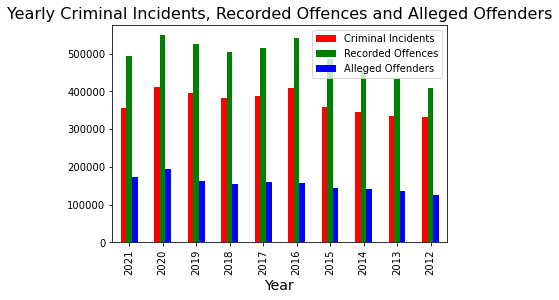

<Figure size 1080x576 with 0 Axes>

In [12]:
# Generate a bar plot showing the distribution of Criminal Incidents, Recorded Offences and Alleged Offenders
only_ci_re_ao_df = reindex_ci_re_ao_df[['Criminal Incidents','Recorded Offences','Alleged Offenders']]
only_ci_re_ao_df.plot(kind="bar", color=['red', 'green', 'blue','black'])

# Add title and label
plt.title("Yearly Criminal Incidents, Recorded Offences and Alleged Offenders",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.figure(figsize=(15,8))
plt.show()

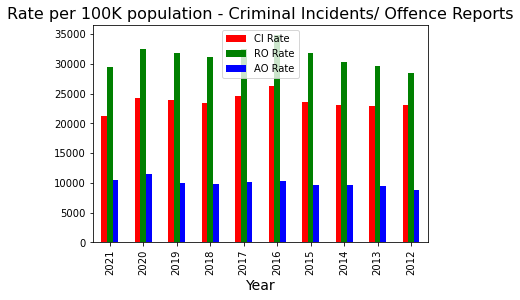

<Figure size 1080x576 with 0 Axes>

In [13]:
# Generate a bar plot showing the distribution Rate per 100K Population for Criminal Incidents, Recorded Offences and Alleged Offenders
rate_ci_re_ao_df = reindex_ci_re_ao_df[['CI Rate','RO Rate','AO Rate']]
rate_ci_re_ao_df.plot(kind="bar", color=['red', 'green', 'blue','black'])

# Add title and label
plt.title("Rate per 100K population - Criminal Incidents/ Offence Reports",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.figure(figsize=(15,8))
plt.show()

In [14]:
# Sort data by year ascending order
reindex_ci_re_ao_df = reindex_ci_re_ao_df.sort_values("Year")
reindex_ci_re_ao_df.round(decimals=2) 

,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
Year,,,,,,,,
2012,330923,23054.34,408983,28472.58,124409,8828.47,864315,1435404.66
2013,334927,22930.01,431391,29544.41,135671,9393.22,901989,1460649.37
2014,344922,23052.10,453935,30364.46,141126,9600.41,939983,1496271.42
2015,358499,23525.30,484868,31868.06,145121,9677.23,988488,1523887.35
2016,409373,26304.42,541368,34796.25,157383,10279.90,1108124,1556289.52
2017,388389,24513.68,513972,32464.40,158706,10185.49,1061067,1584376.78
2018,381193,23381.39,504689,31094.41,155388,9715.27,1041270,1630326.74
2019,394767,23847.41,525241,31803.16,162167,9939.46,1082175,1655387.13
2020,410764,24287.39,548465,32536.65,192965,11485.34,1152194,1691264.56


In [15]:
# Get information for criminal incidents, recorded offences and alleged offenders by Police Region
all_regions = lga_ci_tab1['Incidents Recorded'].loc[lga_ci_tab1['Local Government Area'] != 'Total'].values \
                + lga_ro_tab1['Offence Count'].loc[lga_ro_tab1['Local Government Area'] != 'Total'].values \
                + lga_ao_tab1['Alleged Offender Incidents'].loc[lga_ao_tab1['Local Government Area'] != 'Total'].values 

gaussian_distribution = np.log(all_regions)

In [16]:
# Get data for each police service metropolitan region 

# Get data for crime incidents
lga_ci_tab1_nth = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ci_tab1['Local Government Area'] != 'Total')].values
lga_ci_tab1_sth = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ci_tab1['Local Government Area'] != 'Total')].values
lga_ci_tab1_est = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ci_tab1['Local Government Area'] != 'Total')].values
lga_ci_tab1_wes = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ci_tab1['Local Government Area'] != 'Total')].values
# Get data for recorded offences
lga_ro_tab1_nth = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ro_tab1['Local Government Area'] != 'Total')].values
lga_ro_tab1_sth = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ro_tab1['Local Government Area'] != 'Total')].values
lga_ro_tab1_est = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ro_tab1['Local Government Area'] != 'Total')].values
lga_ro_tab1_wes = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ro_tab1['Local Government Area'] != 'Total')].values
# Get data for alleged offenders
lga_ao_tab1_nth = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ao_tab1['Local Government Area'] != 'Total')].values
lga_ao_tab1_sth = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ao_tab1['Local Government Area'] != 'Total')].values
lga_ao_tab1_est = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ao_tab1['Local Government Area'] != 'Total')].values
lga_ao_tab1_wes = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ao_tab1['Local Government Area'] != 'Total')].values

# Combined data by police service regions for Criminal Incidents, Recorded Offences & Alleged Offenders 
northern_metro = lga_ci_tab1_nth + lga_ro_tab1_nth + lga_ao_tab1_nth 
southern_metro = lga_ci_tab1_sth + lga_ro_tab1_sth + lga_ao_tab1_sth
eastern_metro = lga_ci_tab1_est + lga_ro_tab1_est + lga_ao_tab1_est
western_metro = lga_ci_tab1_wes + lga_ro_tab1_wes + lga_ao_tab1_wes


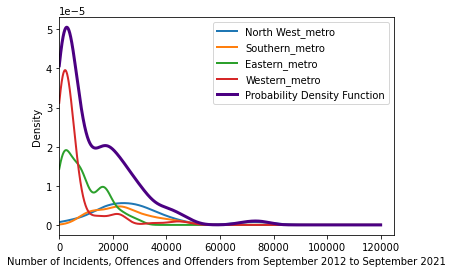

In [17]:
# Calculate the kde for all involved cases and scale them with the number of samples.
# kde = Kernel Density Estimate plot using Gaussian kernels.
# In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF). 
# This function uses Gaussian kernels and includes automatic bandwidth determination.

# Calculate kde for each police service area region
kdea = st.gaussian_kde(northern_metro)
kdeb = st.gaussian_kde(southern_metro)
kdec = st.gaussian_kde(eastern_metro)
kded = st.gaussian_kde(western_metro)

# Get overall kde for all criminal incidents/ offences/ reports
all_reg = np.hstack((northern_metro,southern_metro,eastern_metro,western_metro))
kdeall = st.gaussian_kde(all_reg)

# Set the values for x-axis
grid = np.arange(120000)

# Weighted kde curves
wa = kdea(grid)*(len(northern_metro)/float(len(all_reg)))
wb = kdeb(grid)*(len(southern_metro)/float(len(all_reg)))
wc = kdec(grid)*(len(eastern_metro)/float(len(all_reg)))
wd = kded(grid)*(len(western_metro)/float(len(all_reg)))

# Plot kde graphs on the same axis
fig, ax = plt.subplots()
ax.plot(grid, wa, lw=2, label = "North West_metro")
ax.plot(grid, wb, lw=2, label = "Southern_metro")
ax.plot(grid, wc, lw=2, label = "Eastern_metro")
ax.plot(grid, wd, lw=2, label = "Western_metro")
ax.set_ylabel("Density")
ax.set_xlabel("Number of Incidents, Offences and Offenders from September 2012 to September 2021")
ax.plot(grid, kdeall(grid), color="indigo", lw=3, label = "Probability Density Function")
plt.rcParams["figure.figsize"] = (15,8)
plt.xlim(0,125000)
plt.legend()
plt.show()


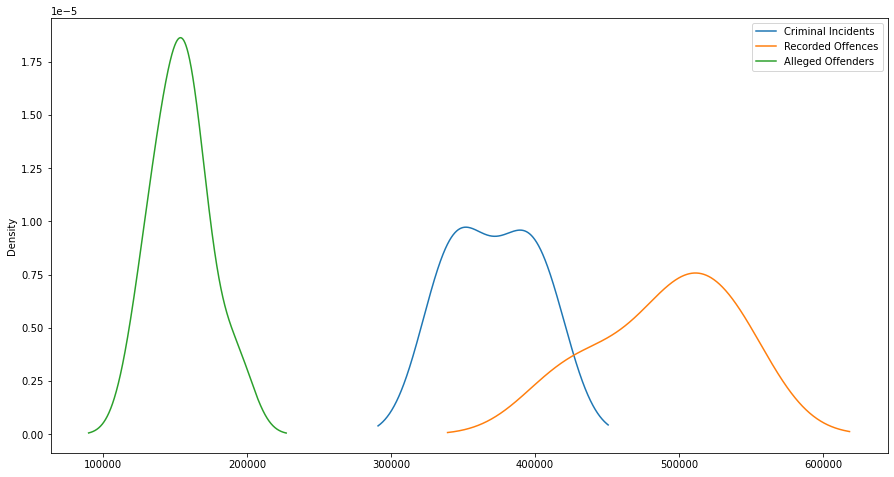

In [18]:
# Perform kde plot for Criminal Incidents, Recorded Offences and Alleged Offenders on the same axis
ax = only_ci_re_ao_df.plot.kde()

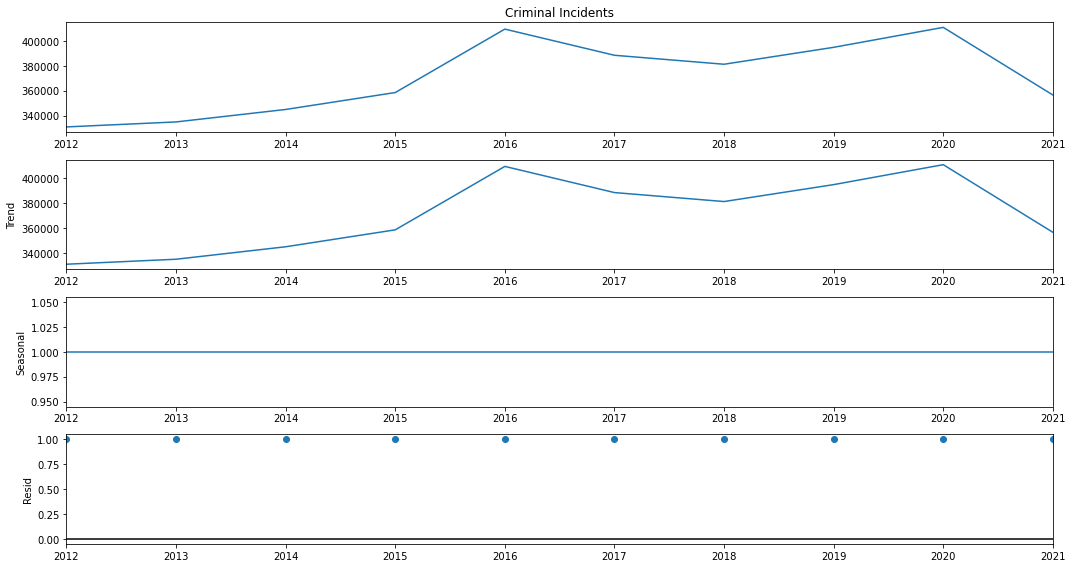

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get Criminal Incidents data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs

ci_series = reindex_ci_re_ao_df["Criminal Incidents"].squeeze()
result = seasonal_decompose(ci_series, model='multiplicative', period=1).plot()

plt.show()

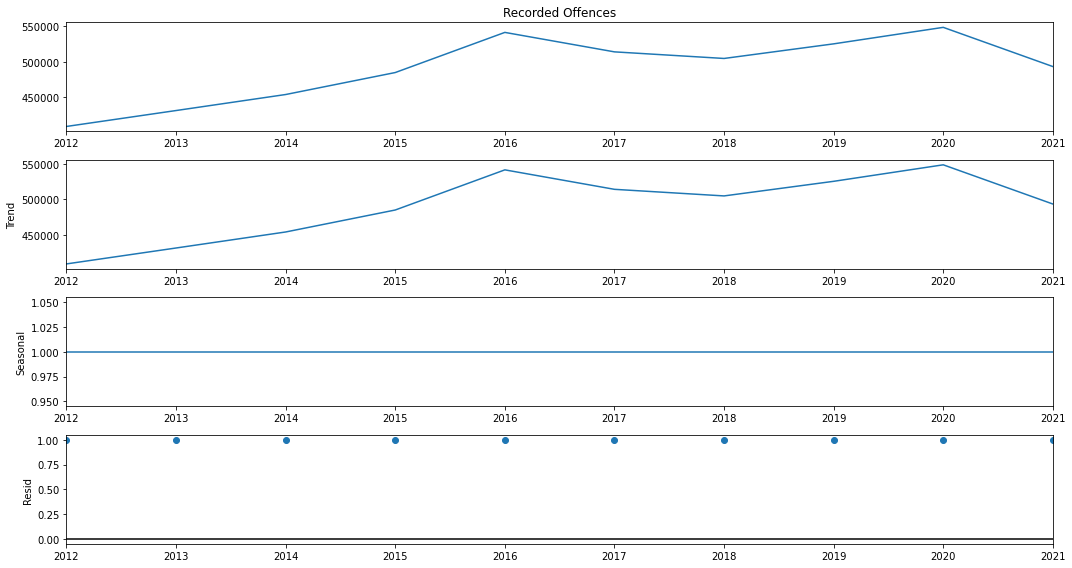

In [20]:
# Get Recorded Offences data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs

ro_series = reindex_ci_re_ao_df["Recorded Offences"].squeeze()
result = seasonal_decompose(ro_series, model='multiplicative', period=1).plot()

plt.show()

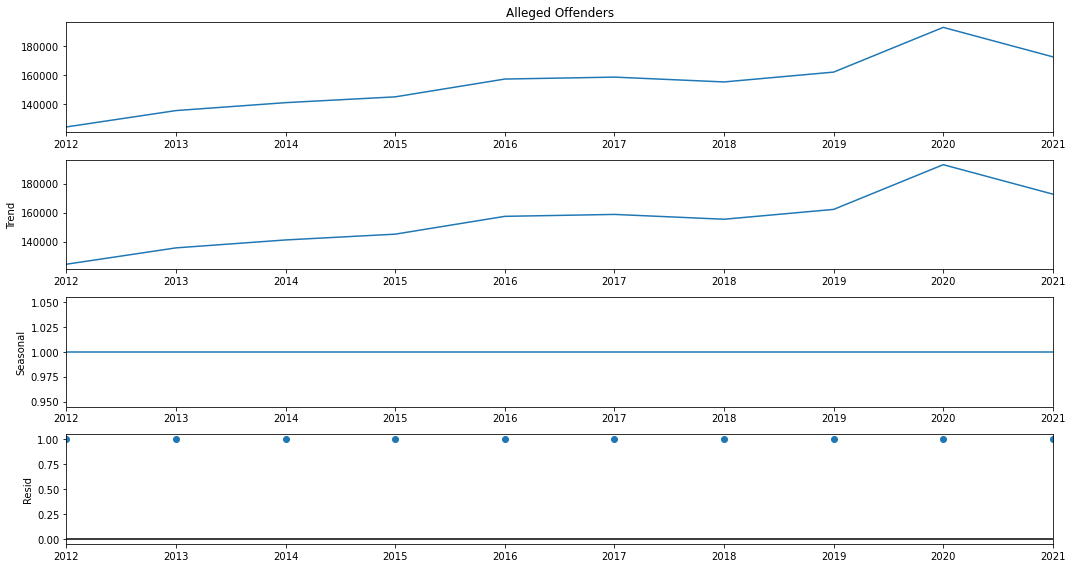

In [21]:
# Get Alleged Offenders data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs
ao_series = reindex_ci_re_ao_df["Alleged Offenders"].squeeze()
result = seasonal_decompose(ao_series, model='multiplative', period=1).plot()

plt.show()

In [22]:
# Read family incidents file
xls_lga_fi = pd.ExcelFile(path+'LGA_Family_Incidents_Year_Ending_September_2021.xlsx')

lga_fi_tab1 = pd.read_excel(xls_lga_fi, "Table 01")

In [23]:
lga_fi_group1 = lga_fi_tab1.groupby(['Year']).sum()
lga_fi_group1 = lga_fi_group1.reset_index()
lga_fi_group1


,Year,Family Incidents,"Rate per 100,000 population"
0,2017,150684,111110.011246
1,2018,155964,112740.315583
2,2019,167534,119391.094638
3,2020,180080,122817.890747
4,2021,185038,129201.734847


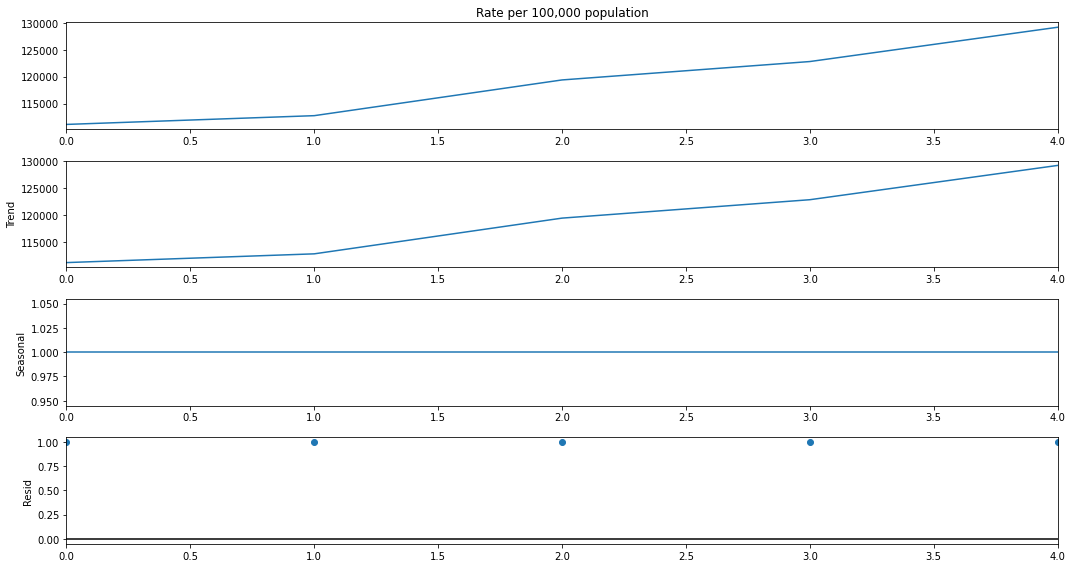

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get Family Incidents data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs

fi_series = lga_fi_group1["Rate per 100,000 population"].squeeze()
result = seasonal_decompose(fi_series, model='multiplicative', period=1).plot()

plt.show()